In [58]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.morphology import closing, square, opening, extrema, binary_erosion, binary_dilation
from scipy import ndimage as ndi
from skimage.feature import canny
from scipy import misc 
import cv2
import numpy as np
import os, sys

## Punto 1

In [92]:
def MyConnComp_2016719749_201126292(binary_image, conn):
    
    def pad_with(vector, pad_width, iaxis, kwargs):
        pad_value = kwargs.get('padder', 10)
        vector[:pad_width[0]] = pad_value
        vector[-pad_width[1]:] = pad_value
    #padding
    binary_image = np.pad(binary_image, 1, pad_with, padder=0)
    # definir elemento estructurante
    if conn == 4:
        e_e = np.array([[0,1,0],[1 ,1 ,1],[0,1,0]])
    else:
        e_e = np.ones((3,3))
    componentes=0        
    labeled_image=np.zeros_like(binary_image);  

    for i in range(1, binary_image.shape[0]):
        for j in range(1,binary_image.shape[1]):

            if binary_image[i,j] == 1 and labeled_image[i,j]==0:
                # se crea una variable temporal para guardar las coordenadas del componente por dilatacion geodesica
                temp = np.zeros_like(binary_image) 
                temp[i,j]=1
                component_0 = np.logical_and(binary_dilation(temp,e_e),binary_image)
                end = True
                while end:
                    img_dilation = binary_dilation(component_0, element_est3) 
                    inters = np.logical_and(img_dilation,binary_image)
                    if (component_0 == inters).all:
                        end = False
                    else:
                        component_0 = inters

                #Se adiere el elemento conexo a la imagen completa
                #plt.imshow(inters)
                inters = inters*componentes;
                labeled_image = labeled_image+inters;
                componentes +=  1;
    def get_indices(num_labels, labeled_image):
        pixel_labels = []
        for lbl in range(num_labels):
            pixel_labels.append(np.where(labeled_image==lbl))                                  
        return np.array(pixel_labels) 
    pixel_labels = get_indices(componentes, labeled_image)
    return labeled_image, pixel_labels

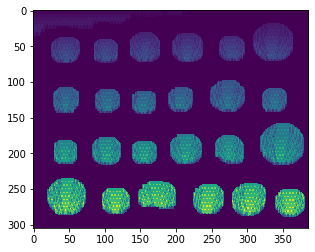

In [93]:
mask0 = image > 120
# apply closing to conecting pixel closer to each one and fill holes inside
bw_1 = closing(mask0, square(5))
# apply opening to eliminate small components
op_1 = opening(bw_1, square(18))
pd, rt = MyConnComp_2016719749_201126292(op_1, 4)
plt.imshow(pd)

In [94]:
def MyConnComp(binary_image, conn):
    try:
        def get_indices(num_labels, labeled_image):
            pixel_labels = []
            for lbl in range(num_labels):
                pixel_labels.append(np.where(labeled_image==lbl))                                  
            return np.array(pixel_labels)                        
        if conn==4:
            labeled_image, num_labels = label(binary_image, connectivity=1, return_num= True)
            pixel_labels = get_indices(num_labels, labeled_image)                    
        elif conn==8:
            labeled_image, num_labels = label(binary_image, connectivity=2, return_num = True)
            pixel_labels = get_indices(num_labels, labeled_image)                       
        else:
            raise Exception('Ingrese un valor de conectividad 4 0 8')
        return labeled_image, pixel_labels
    except AttributeError:
        print('La imagen no corresponde a una matrix binaria')

In [95]:
image = data.coins()
op = 0
def eliminación_componentes(imagen, trehs):
    global op
    mask = imagen > trehs
    # apply closing to conecting pixel closer to each one and fill holes inside
    print(imagen.shape)
    bw = closing(mask, square(5))
    # apply opening to eliminate small components
    op = opening(bw, square(18))
    # label image regions
    label_image, labels =  MyConnComp(op, 8)
    #eliminate elements with label 6 
    print(labels.shape[0]+1)
    lbl = np.random.randint(labels.shape[0]+1, size=1)
    print('Componente {} eliminado'.format(lbl))
    delete_component = np.copy(label_image)
    delete_component[label_image==lbl]=-1
    #
    original_delete = np.copy(imagen)
    original_delete[delete_component==-1]= 0
    print(original_delete.shape)
    plt.figure(figsize=(10, 6))
    #plt.suptitle('Figura 2. Objectos superpuestos', x= 0.5, y=0.99)
    plt.subplot(3,2,1)
    plt.title('Imagen original')
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.subplot(3,2,2)
    plt.title('Imagen binaria')
    plt.imshow(op, cmap='gray')
    plt.axis('off')
    plt.subplot(3,2,3)
    plt.title('Imagen compon. conexos')
    plt.imshow(label_image)
    plt.axis('off')
    plt.subplot(3,2,4)
    plt.title('Imagen sin una etiqueta')
    plt.imshow(delete_component)
    plt.axis('off')
    plt.subplot(3,2,5)
    plt.title('Imagen original sin una etiqueta')
    plt.imshow(original_delete, cmap= 'gray')
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig(os.path.join(os.getcwd(),'circles.jpg'))

(303, 384)
26
Componente [5] eliminado
(303, 384)


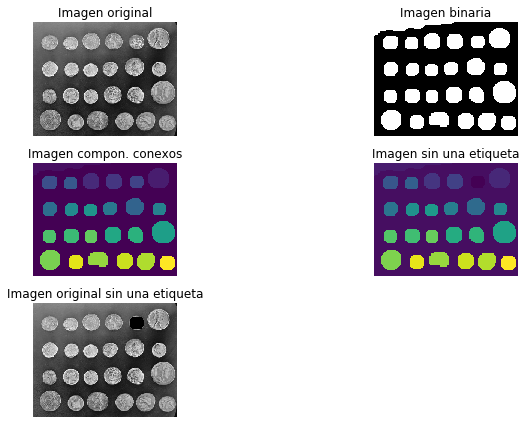

In [96]:
eliminación_componentes(image, 120)

### 4.  ¿Qué  características  deberían  tener  las  imágenes  para  que  no  se  dificulte  la  tarea  de  extraercomponentes conexos

Para que no sea dificil la extracción de componentes conexos las imagenes deben presentar poco ruido y contar con pocas clases diferentes, preferiblemente que los obectos no esten superpuestos. Por ejemplo en la figura 1 podemos obervas como las monedas son segmentadas con buena precision. Sin embargo al usar una imagen con objetos superpuestos encontramos el problema de que los componentes que estan superpuestos son clasificados como si fueran uno mismo (Ver Figura 2). 

(500, 500)


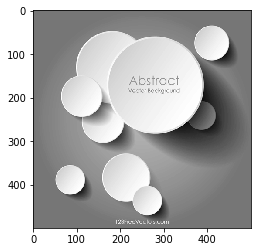

In [18]:
img_circles = data.imread('./circles.png', as_gray= True)
img_circles = img_circles * 255
img_circles = img_circles.astype('uint8')
print(img_circles.shape)
plt.imshow(img_circles, cmap= 'gray')

(500, 500)
4
Componente [0] eliminado
(500, 500)


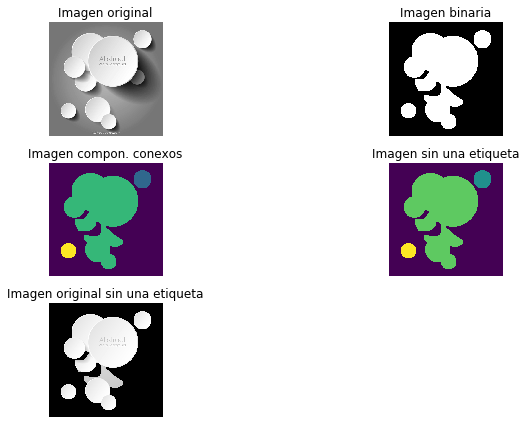

In [19]:
eliminación_componentes(img_circles, 200)

In [20]:
matrix1 = np.zeros((15,15), np.uint8)
for i in range(0,matrix1.ravel().shape[0],3):
    matrix1.ravel()[i] = 1

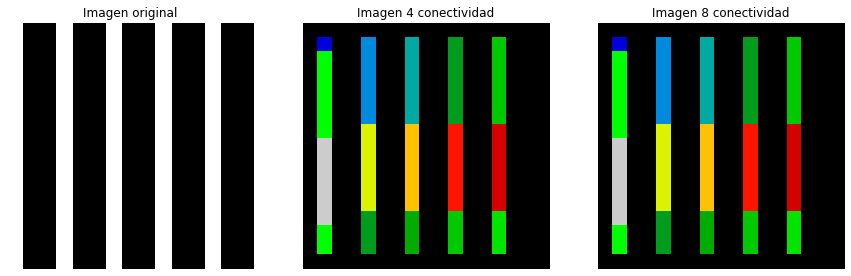

In [97]:
matrix1_conn4, labels_conn4 =  MyConnComp_2016719749_201126292(matrix1, 4)
matrix1_conn8, labels_conn8 =  MyConnComp_2016719749_201126292(matrix1, 8)
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(matrix1,cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(matrix1_conn4,cmap='nipy_spectral')
plt.title('Imagen 4 conectividad')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(matrix1_conn8,cmap='nipy_spectral')
plt.title('Imagen 8 conectividad')
plt.axis('off')
plt.savefig(os.path.join(os.getcwd(),'4y8igual.jpg'))

En la imagen anterior se aplico una conectividad de 4 y 8 para la misma imagen, sin embargo, debido a que la ventana de conectividad para los dos tipos es muy pequeña no alcanza considerar del mismo objecto dos rayas separadas.

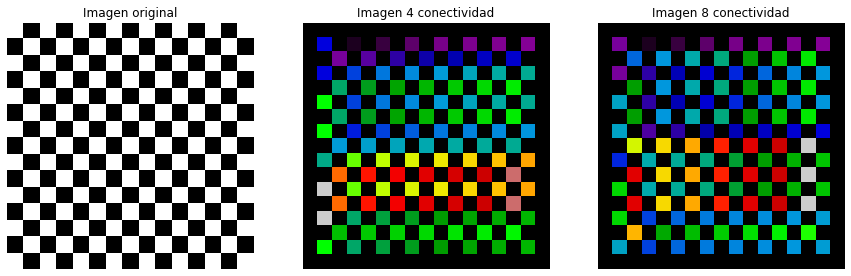

In [98]:
matrix2 = np.zeros((15,15), np.uint8)
for i in range(0,matrix2.ravel().shape[0],2):
    matrix2.ravel()[i] = 1
    
matrix2_conn4, labels2_conn4 =  MyConnComp_2016719749_201126292(matrix2, 4)
matrix2_conn8, labels2_conn8 =  MyConnComp_2016719749_201126292(matrix2, 8)
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(matrix2,cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(matrix2_conn4,cmap='nipy_spectral')
plt.title('Imagen 4 conectividad')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(matrix2_conn8,cmap='nipy_spectral')
plt.title('Imagen 8 conectividad')
plt.axis('off')
plt.savefig(os.path.join(os.getcwd(),'4y8diferente.jpg'))

En la imagen anterior se aplico una conectividad de 4 y 8 para la misma imagen, sin embargo, debido a que la ventana de conectividad de 4-adyacencia solo tiene en cuenta los pixeles vecinos perpendiculares, el algoritmo detecto cada pixel como un componente unico. Por el contrario, la 8-adyacencia si tiene en cuenta la pixeles vecinos diagonales, por lo tanto, conecto todos los pixeles del foreground como un componente unico. 

## Problema Biomédico 

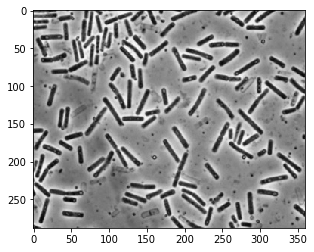

In [101]:
img_bacillus = data.imread('./bacillus.jpg', as_gray= True)
plt.imshow(img_bacillus, cmap= 'gray')

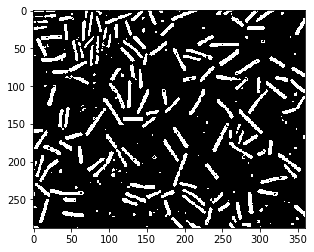

In [103]:
binary_bacillus = np.zeros_like(img_bacillus, np.uint8)
binary_bacillus[img_bacillus<120] = 1
plt.imshow(binary_bacillus, cmap= 'gray')

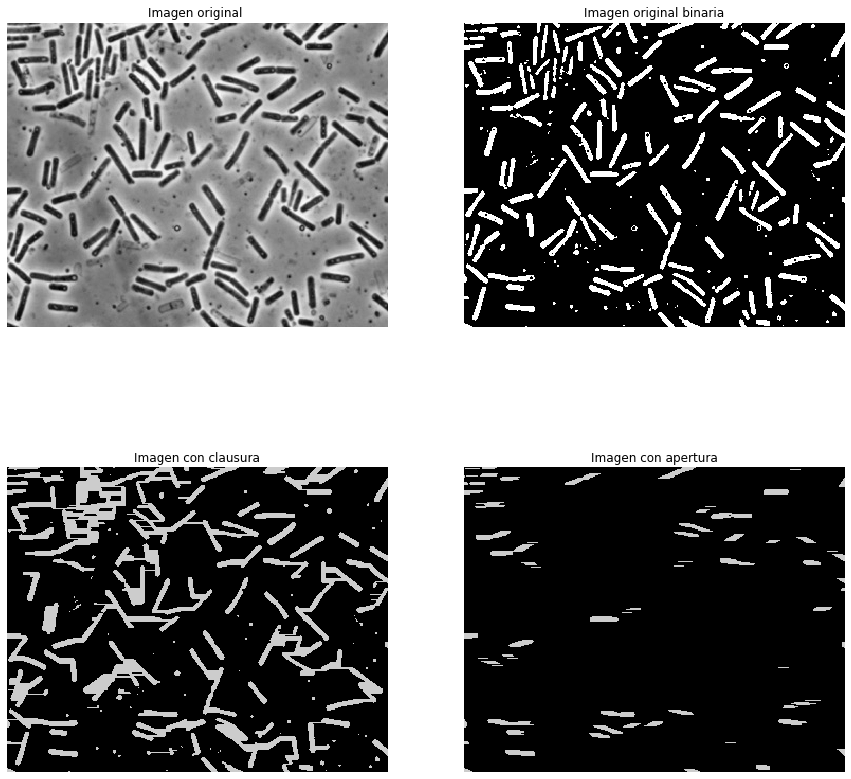

In [104]:
element_est = np.ones((1,10),np.uint8)
closing_bacillus = closing(binary_bacillus, element_est)
# apply opening to eliminate small components
op_bacillus = opening(binary_bacillus,element_est)

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(img_bacillus,cmap='gray')
plt.title('Imagen original ')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(binary_bacillus,cmap='gray')
plt.title('Imagen original binaria')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(closing_bacillus,cmap='nipy_spectral')
plt.title('Imagen con clausura')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(op_bacillus,cmap='nipy_spectral')
plt.title('Imagen con apertura')
plt.axis('off')
plt.savefig(os.path.join(os.getcwd(),'opclose.jpg'))

Como se puede ver en la figura anterior, para encontrar los vacilos horizontales es mejor el uso de la tecnica de morfología apertura. Esto debido al hecho de que al aplicar clausura se juntan los componenetes y se hallan en sentidos difrentes del horizontal. En la siguiente figura, se observe que al aumentar el elemento estructurante, en el proceso de erosion de la apertura se piede mucha información.

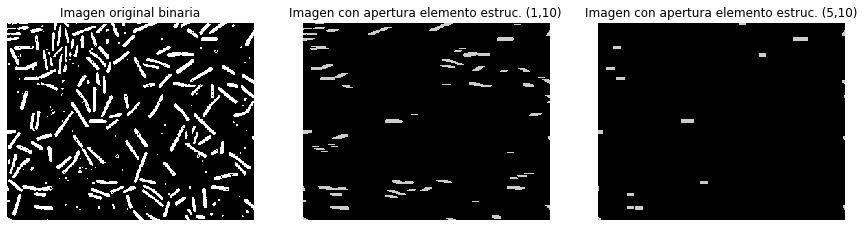

In [107]:
element_est2 = np.ones((5,10),np.uint8)
op_bacillus2 = opening(binary_bacillus, element_est2)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(binary_bacillus,cmap='gray')
plt.title('Imagen original binaria')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(op_bacillus,cmap='nipy_spectral')
plt.title('Imagen con apertura elemento estruc. (1,10)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(op_bacillus2,cmap='nipy_spectral')
plt.title('Imagen con apertura elemento estruc. (5,10)')
plt.axis('off')
plt.savefig(os.path.join(os.getcwd(),'element_estr.jpg'))

In [108]:
# para este punto por a usar apertura por reconstrucción, deteccion de bordes canny y rellenos de huecos
base = binary_erosion(binary_bacillus, np.ones((5,1),np.uint8))
element_est3 = np.ones((10,1),np.uint8)
op_bacillus_verticales = opening(binary_bacillus, element_est3)
end = True
while end:
    temp = opening
    img_dilation = binary_dilation(op_bacillus_verticales, element_est3) 
    inters = np.logical_and(img_dilation,base)
    if (temp == inters).all:
        end = False
        
edges = canny(inters)
fill_coins = ndi.binary_fill_holes(edges)

(-0.5, 359.5, 287.5, -0.5)

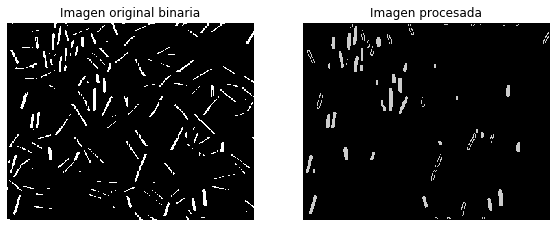

In [113]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(base,cmap='gray')
plt.title('Imagen original binaria')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(fill_coins,cmap='nipy_spectral')
plt.title('Imagen procesada')
plt.axis('off')

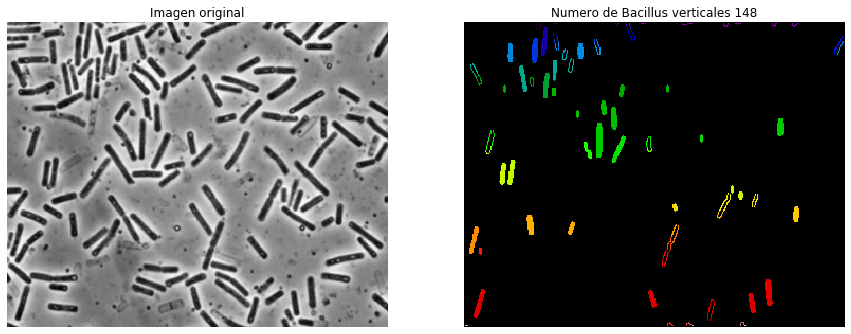

In [115]:
conteo_bacillus, num_bacillus =  MyConnComp(fill_coins, 4)
num_bacillus_verticales = num_bacillus.shape[0]
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_bacillus,cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(conteo_bacillus,cmap='nipy_spectral')
plt.title('Numero de Bacillus verticales '+str(num_bacillus_verticales))
plt.axis('off')
plt.savefig(os.path.join(os.getcwd(),'vacilos_vert.jpg'))

Con el objectivo de hallar los vacilos verticales utilize apertura por reconstrucción con un elemento estructurante de 10 x 1. A seguir use la deteccion de bordes de Canny y la operación morfologica de rellenado de huecos. Para el conteo de los elementos use el algoritmo de componentes conexos. Como resultade se segmentaron 66 Bacillus verticales.